# Correlation Checks

## Business Objective

-------------------------------------------------------------------------------------------------------------------------------

 To analyze data sets in order to observe whether and how strongly pairs of variables are related.
 We can then resolve to fine tune each variable to meet our expectations and need.
 
-------------------------------------------------------------------------------------------------------------------------------


In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import scipy
import matplotlib.pyplot as plt
import time
import statistics

In [2]:
#Changing the directory using os package, to the place where the excel sheet exists
os.chdir('C:/Users/Viswa/Desktop/R Project')

#Name of the excel sheet
excel_file='Project_Part_2.xlsx'

#Reading excel sheet into sales.
comp=pd.read_excel(excel_file)

In [3]:
comp

,global_rank,company,sales_billion,profits_billion,assets_billion,market_value_billion
0,1347,Agile Property Holdings,4.8,0.8,14.7,4.0
1,8,Agricultural Bank of China,103.0,23.0,2124.2,150.8
2,853,Aluminium Corp of China,23.7,-1.3,28.7,8.4
3,1436,Angang Steel,12.3,-0.7,16.2,4.1
4,728,Anhui Conch Cement,7.2,1.0,14.0,15.9
5,960,Baidu,3.5,1.7,7.3,29.7
6,488,Bank of Beijing,6.3,1.4,151.7,13.1
7,11,Bank of China,98.1,22.1,2033.8,131.7
8,54,Bank of Communications,43.5,9.4,846.4,56.7
9,1246,Bank of Nanjing,2.2,0.5,44.7,4.4


# Normal Correlation
-These tests look for an association between numerical variables

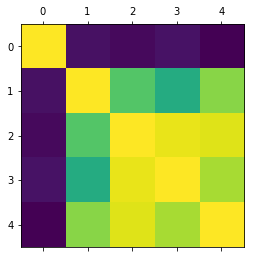

In [4]:
#plt.matshow(comp.corr())
plt.matshow(comp.corr())

plt.show()


In [5]:
comps=pd.DataFrame
comps=comp.drop(['global_rank'],axis=1)
comps.corr()

,sales_billion,profits_billion,assets_billion,market_value_billion
sales_billion,1.000000,0.590118,0.409830,0.725870
profits_billion,0.590118,1.000000,0.945901,0.923257
assets_billion,0.409830,0.945901,1.000000,0.801346
market_value_billion,0.725870,0.923257,0.801346,1.000000


In [6]:
comp.describe()

,global_rank,sales_billion,profits_billion,assets_billion,market_value_billion
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,972.792593,22.403704,2.040000,127.399259,20.465185
std,554.339800,47.836466,5.253573,405.949323,39.244472
min,1.000000,0.800000,-1.500000,1.300000,0.200000
25%,549.500000,4.900000,0.400000,8.350000,5.400000
50%,991.000000,10.300000,0.600000,15.500000,8.700000
75%,1439.500000,18.000000,1.300000,41.250000,14.800000
max,1948.000000,411.700000,37.800000,2813.500000,261.200000


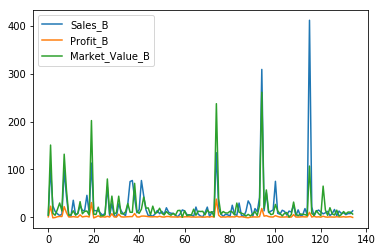

In [7]:
%matplotlib inline
comp_ref=comp.drop(['company','global_rank','assets_billion'],axis=1)
plt.plot(comp_ref)
plt.legend(['Sales_B','Profit_B','Market_Value_B'],loc=2)

Assets_Billion was removed for this plot, since it is much larger than the other quantities, and does not give us a proper perspective of the other quantities.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276ACDFEE10>,
      dtype=object)

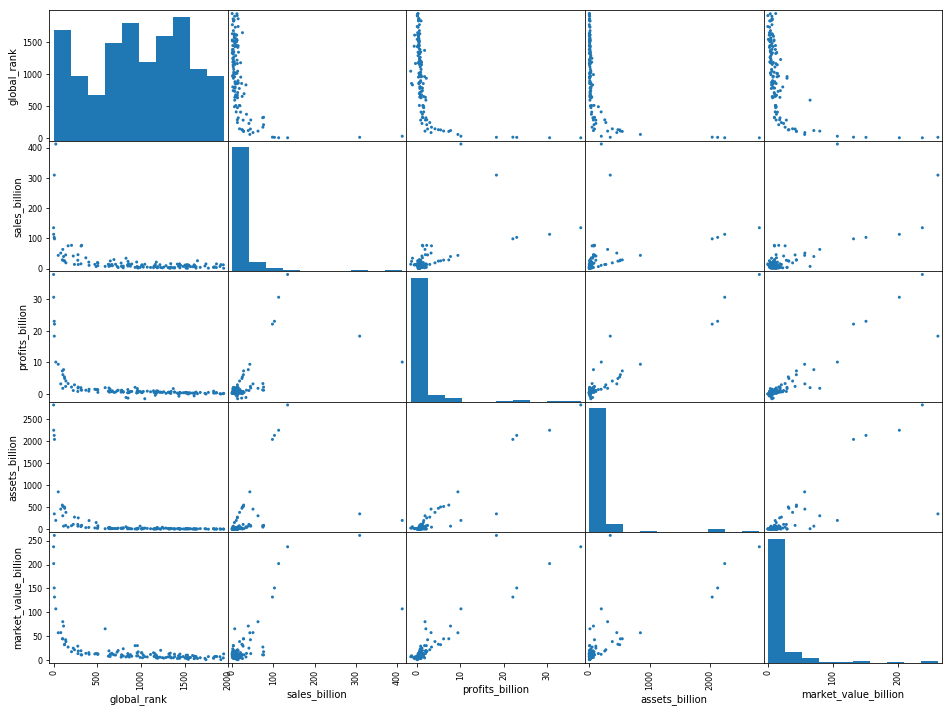

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(comp,figsize=(16,12),alpha=1)

The flat lines in the first column and first row depict that there is no relationship betweenglobal_rank and any of the other factors.

If there existed more samples, then we would get more solid lines. A line with an upward slope, implies that there exists a positive correlation between variables.

Almost all graphs have lines with upward slopes, this implies that there is a correlation and a relation.

# Pearson's Correlation

-Tests for the strength of the association between two continuous variables

In [9]:
scipy.stats.pearsonr(comp['profits_billion'],comp['sales_billion'])

(0.5901177082672943, 5.0039335971871726e-14)

r = 0.59 and p=5e-14

Values between Profit and Sales

In [10]:
scipy.stats.pearsonr(comp['assets_billion'],comp['sales_billion'])

(0.40983016309632103, 7.969918017223284e-07)

r = 0.41 and p=8e-14

Values between Assets and Sales

In [11]:
scipy.stats.pearsonr(comp['market_value_billion'],comp['sales_billion'])

(0.7258704279464561, 2.2940713321851338e-23)

r = 0.73 and p=8e-14 

Values between Market Value and Sales

In [12]:
scipy.stats.pearsonr(comp['profits_billion'],comp['assets_billion'])

(0.9459012008859864, 7.022370745232362e-67)

r = 0.95 and p=7e-67 

Values between Profit and Assets

In [13]:
scipy.stats.pearsonr(comp['market_value_billion'],comp['assets_billion'])

(0.801346429870509, 1.795677382452173e-31)

r = 0.80 and p=2e-31

Values between Market Value and Assets

In [14]:
scipy.stats.pearsonr(comp['market_value_billion'],comp['profits_billion'])

(0.9232570858072923, 4.1385597517240784e-57)

r = 0.92 and p=4e-57 

Values between Market Value and Profit

### About r:
    -'r' is the correlation coefficient that measures the strength and direction of a linear relationship between two variables on a scatterplot. The value of r is always between +1 and –1.
    
#### Values of 'r' and their meanings:
    
Exactly –1. A perfect downhill (negative) linear relationship

–0.70. A strong downhill (negative) linear relationship

–0.50. A moderate downhill (negative) relationship

–0.30. A weak downhill (negative) linear relationship

0. No linear relationship


+0.30. A weak uphill (positive) linear relationship

+0.50. A moderate uphill (positive) relationship

+0.70. A strong uphill (positive) linear relationship

Exactly +1. A perfect uphill (positive) linear relationship

### About p:
    -'p' is the level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event
    
#### Values of 'p' and their meanings:
The most commonly used p-value is 0.05. If the investor concludes that the p-value is less than 0.05, there is strong evidence against the null hypothesis. As a result, we would reject the null hypothesis and accept the alternative hypothesis.

## Conclusion

Thus, through this we see that,

    -Values between Profit and Assets
    -Values between Profit and Market Value
    
are very much related to one another.